# Wavelength calibration

This notebook contains the instructions to process the laboratory data in order to obtain the wavelength calibration for a series.


# Step 0. Adjust headers

The 29 - 33 have the filter from M1 and the order M2.
The header has not been updated to the new convention, so the pipeline will interpret as order 1 instead of order 2.

- Change G_ORD_B to 2
- Add keyword to remind that filter is the M1 filter, not the M2: G_FLT_B = 1


In [2]:
from glob import glob as gb
from astropy.io import fits
import os

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
gcs = [18,19,20,21]

for gc in gcs:
    files = gb(os.path.join(rootdir,'**','*GC'+str(gc)+'*sw.fits'), recursive=True)
    for file in files:
        with fits.open(file, mode='update') as hdl:
            header = hdl[0].header
            header['G_ORD_B'] = 2
            header['G_FLT_B'] = 1

## Step 1. Data reduction

It is possible to reduce only part of the data by selecting a list of numbers (of the GC, gas cells) names
and limiting to a channel (e.g. 'sw' in the example).

```
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26],channels=['sw'])
```

Otherwise, the entire reduction can be done in one shot.

In [7]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
reduceData(rootdir)


In GC 1 0  there are  134 sw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 2 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 3 0  there are  251 sw files
number of files  251
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 4 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...

## Step 2. Check the coverage

Plot the central pixel of the central spaxel for the different combinations.

Solid line is dichroic 130, dashed line is dichroic 105.

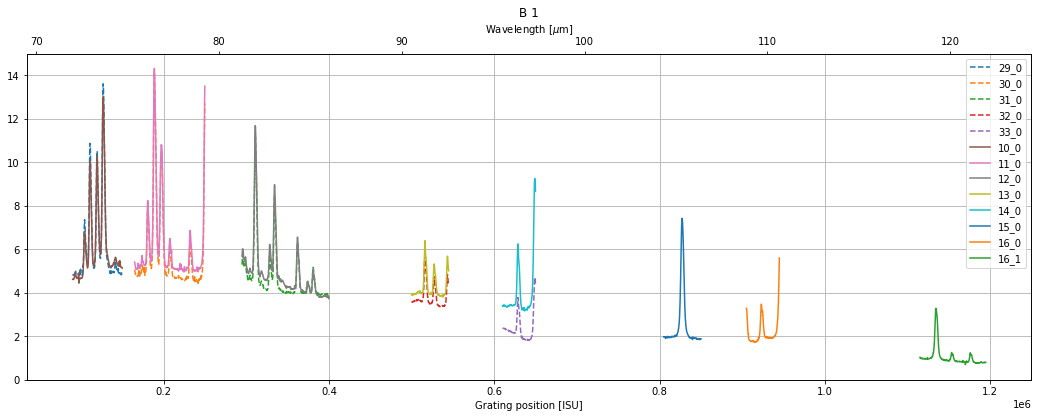

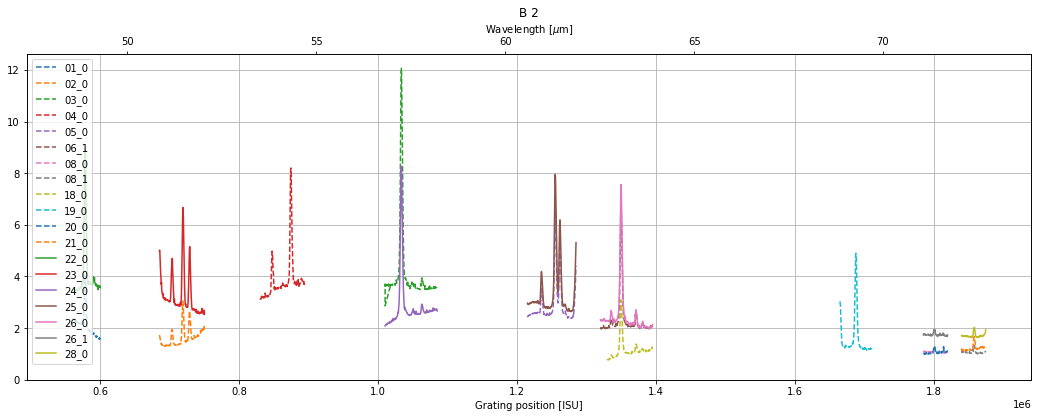

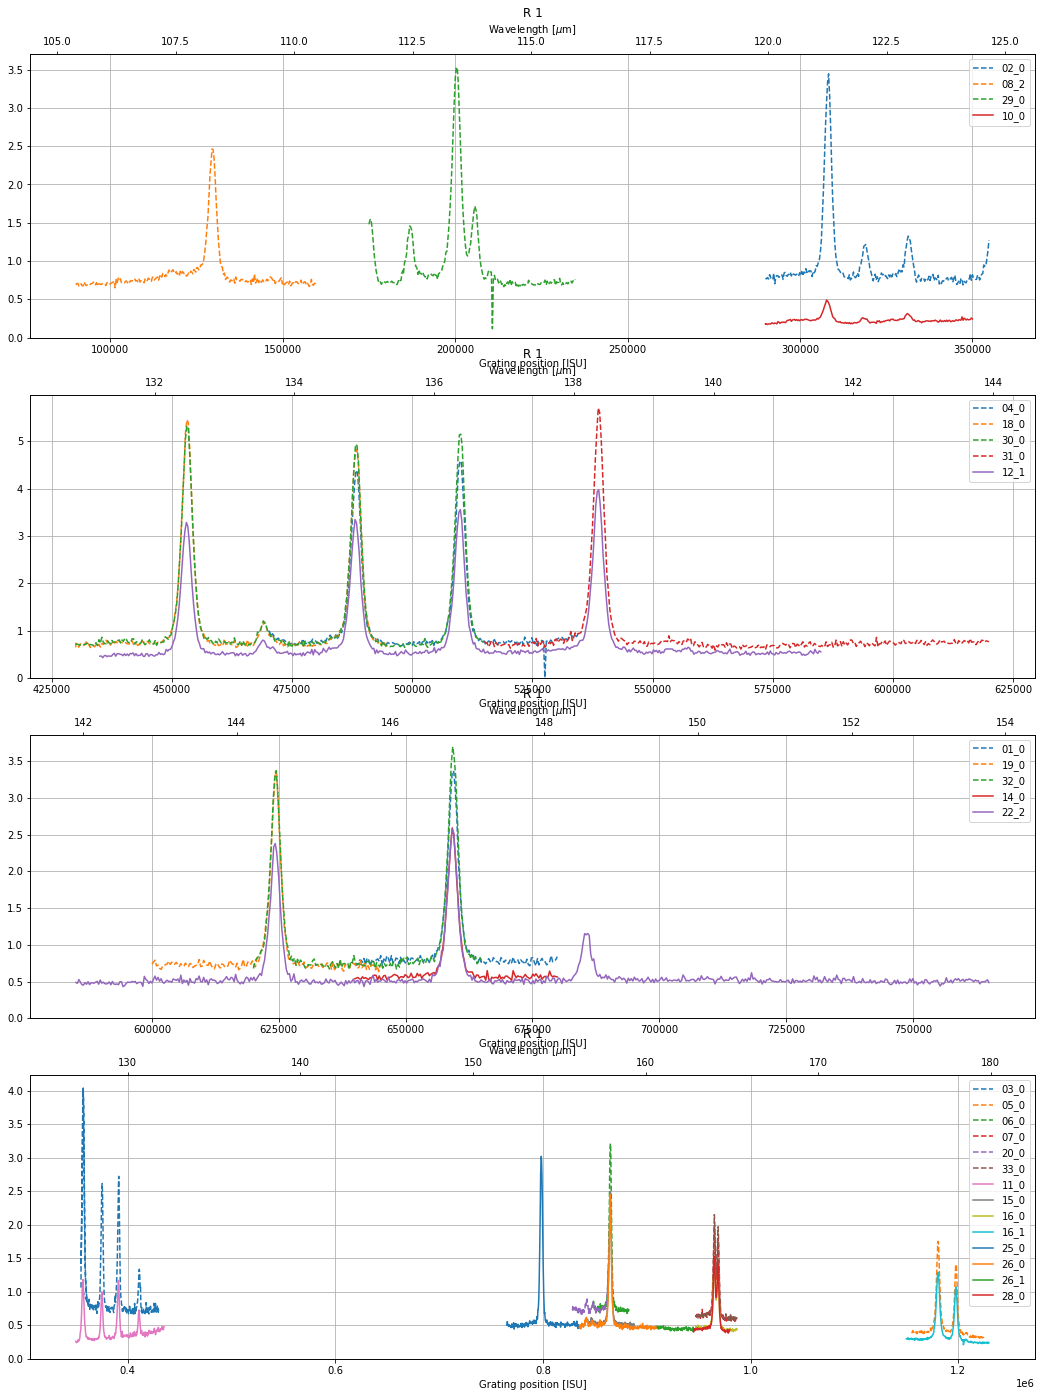

In [1]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/R1_105_GC21_0.fits'

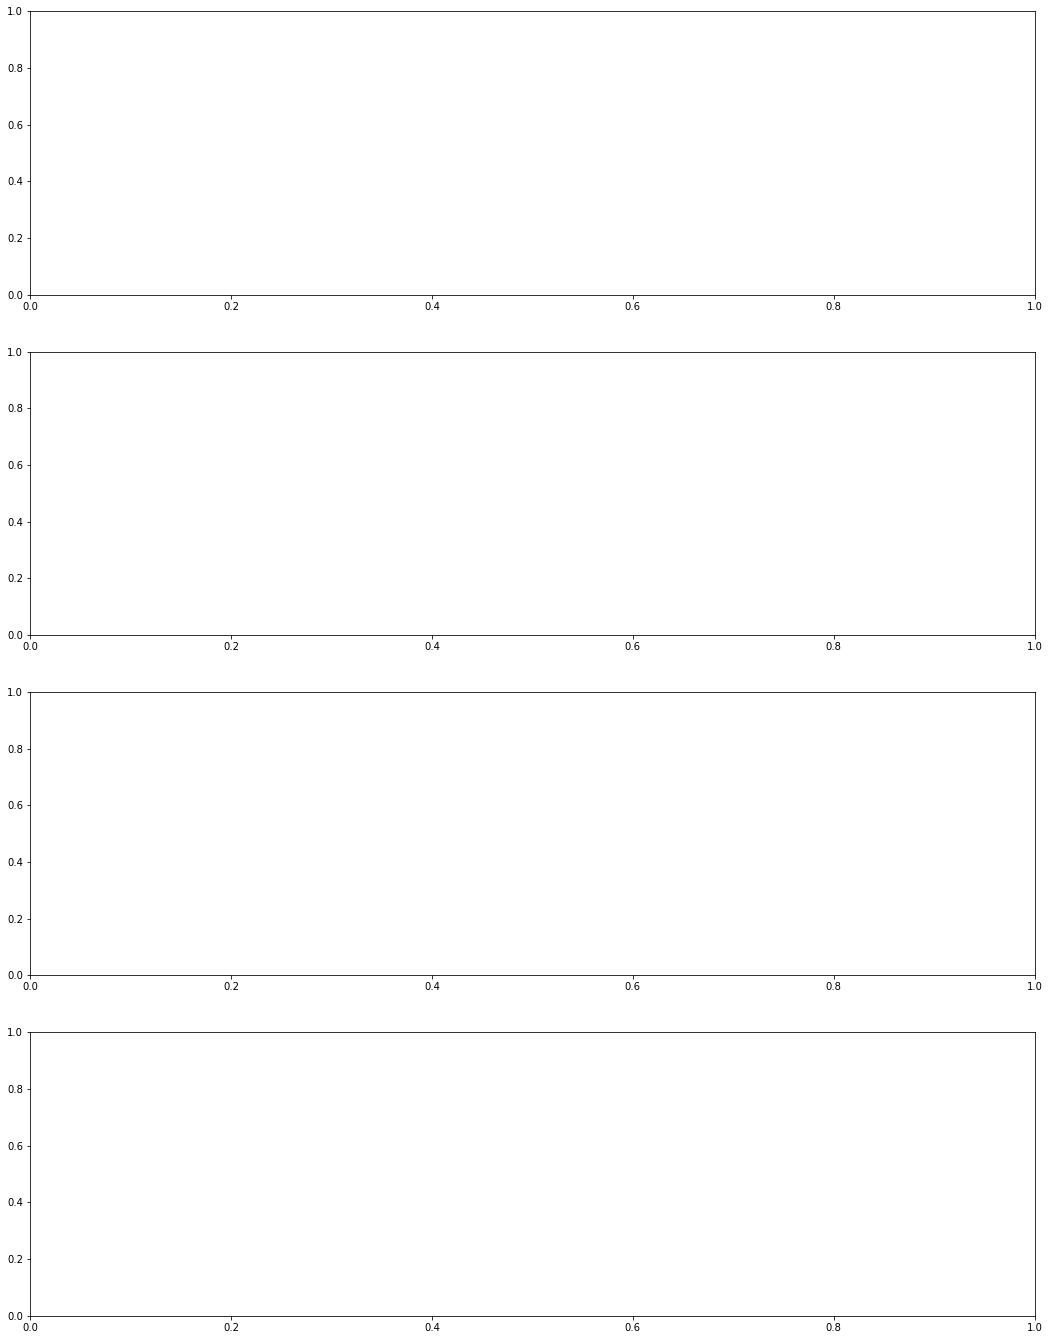

In [2]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
plotLines(rootdir,'R',1, files = [rootdir+'Reduced/R1_105_GC21_0.fits',rootdir+'Reduced/R1_105_GC06_0.fits'])


## Step 3. Merge files

In same cases an observation is done in two parts. These cases have to be merged before fitting the lines, otherwise the fitting is difficult and incorrect in some pixels.

In this case the blue seems OK.
The red has a few mergings:
- B    6_0 +  7_0 ->  6_1
- R    8_0 +  8_1 ->  8_2
- R   12_0 + 13_0 -> 12_1
- R   22_0 + 23_0 -> 22_1
- R   22_1 + 24_0 -> 22_2
- R    6_0 + 21_0 ->  6_1

In [16]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [17]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC08_1.fits'
outfile = rootdir + 'R1_105_GC08_2.fits'
mergeFiles(infile1, infile2, outfile)

In [18]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [19]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_0.fits'
infile2 = rootdir + 'R1_130_GC23_0.fits'
outfile = rootdir + 'R1_130_GC22_1.fits'
mergeFiles(infile1, infile2, outfile)

In [20]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_1.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC22_2.fits'
mergeFiles(infile1, infile2, outfile)

In [21]:
#from fifipy.wavecal import mergeFiles
#rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
#infile1 = rootdir + 'R1_105_GC06_0.fits'
#infile2 = rootdir + 'R1_105_GC21_0.fits'
#outfile = rootdir + 'R1_130_GC06_1.fits'
#mergeFiles(infile1, infile2, outfile)

Move unused files away.

In [22]:
import os
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
os.mkdir(rootdir+'OLD')

files = [
    'B2_105_GC06_0.fits',
    'B2_105_GC07_0.fits',
    'R1_105_GC08_0.fits',
    'R1_105_GC08_1.fits',
    'R1_130_GC12_0.fits',
    'R1_130_GC13_0.fits',
    'R1_130_GC22_0.fits',
    'R1_130_GC23_0.fits',
    'R1_130_GC22_1.fits',
    'R1_130_GC24_0.fits',
#    'R1_105_GC06_0.fits',
    'R1_105_GC21_0.fits',
#    'B2_105_GC08_0.fits',
#    'B2_105_GC08_1.fits',
#    'B2_130_GC26_1.fits',
#    'B2_130_GC28_0.fits',
]


for file in files:
    os.rename(rootdir+file, rootdir + 'OLD/'+file)

Double check

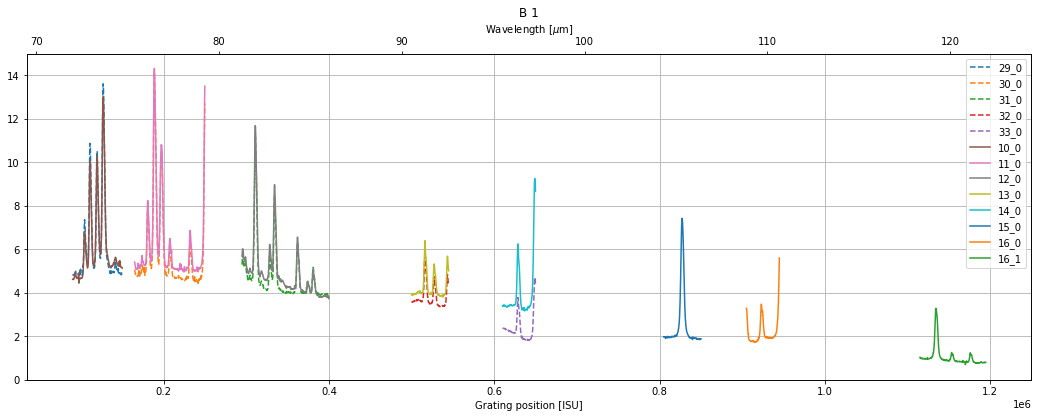

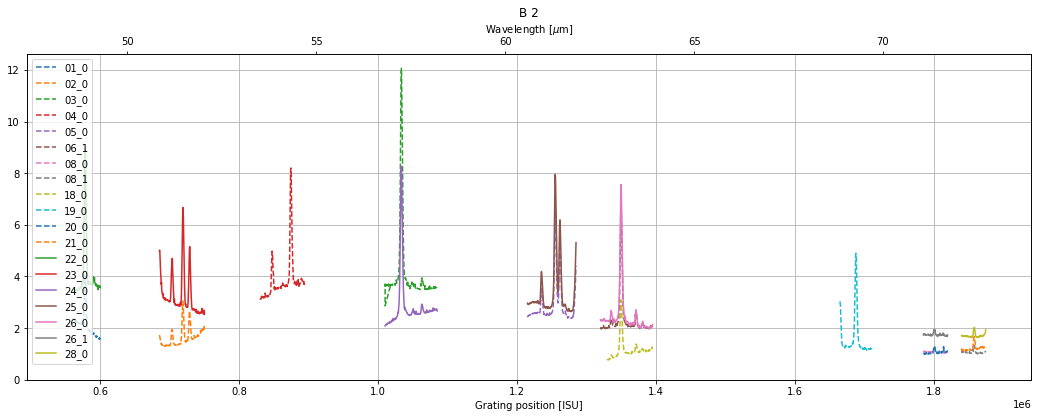

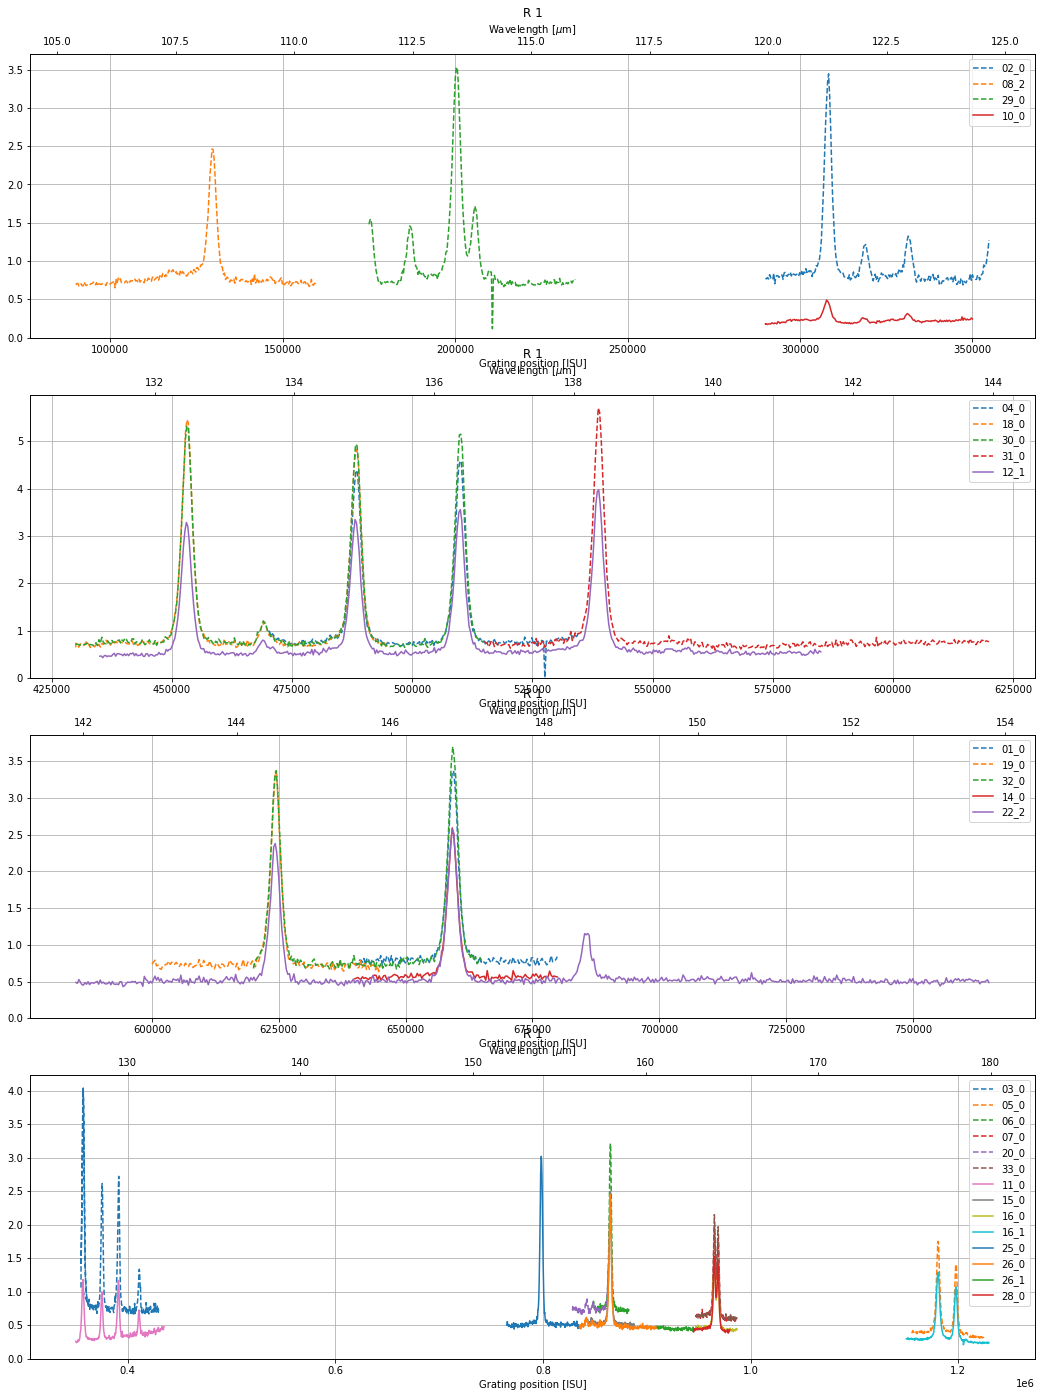

In [3]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 4. Fit the cubes

It is possible to fit a single cube and show the results.

```
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)
```
Otherwise, the entire fitting can be done in one shot.
The results are conserved in pdf files with the same names which can be inspected to check the quality of the fits.

In [4]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

60 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B2_105_GC05_0.fits BLUE 2   ................
59 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B2_105_GC04_0.fits BLUE 2   ................
58 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/R1_130_GC26_0.fits RED 1   ................
57 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/R1_105_GC06_0.fits RED 1   ................
56 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B1_105_GC33_0.fits BLUE 1   ................
55 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B2_105_GC01_0.fits BLUE 2   ................
54 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/R1_105_GC18_0.fits RED 1   ................
53 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B2_105_GC03_0.fits BLUE 2   ................
52 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/R1_130_GC14_0.fits RED 1   ................
51 /home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/B2_130_GC25_0.fits BLUE 2   ................
50 /

##  Step 5. Fit the parameters

- For each case, run first the calibration with all free parameters (ISOFF is treated like a Gaussian with 3 params).
- Then fix the parameters to the best values except for ISOFF.
- Run the fit for each spaxel independently.

### R 105

Number of files  16


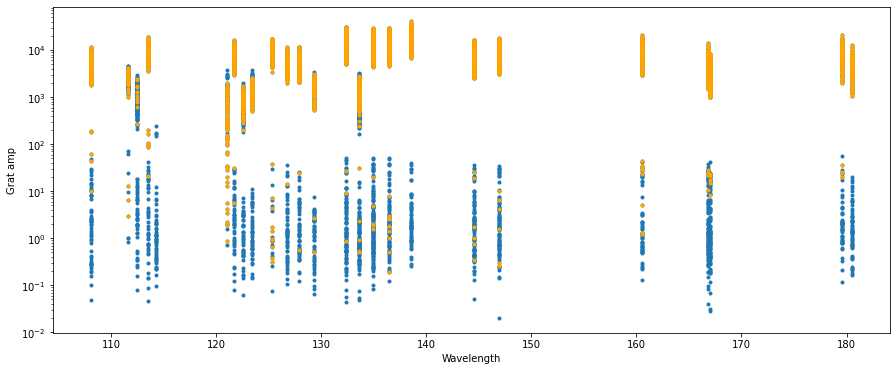

Number of files  16


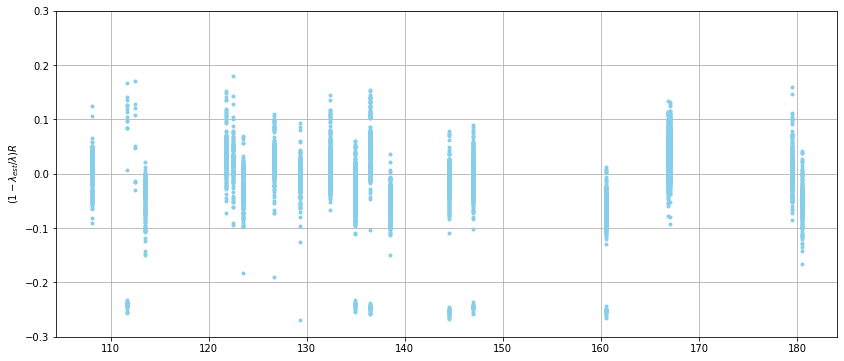

NP =  14.32393585518956
g0 =  0.11716352487901183
a  =  425.4111576441785
PS =  0.0005847072706380851
QS =  1.3833336250081508e-06
QOFF =  4.211749157787619

ai =  6.459480913790727
bi =  -164.25674904584716
ci =  1151120.4725255314


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

# Total fit
channel = 'R'
order = 1
dichroic = 105
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1151064.875,
1151202.324,nan,1151532.460,1151725.479,
1150421.971,1150491.404,1150580.045,1150677.072,
nan,1150048.423,1150046.713,1150064.005,
1150073.355,1150192.447,1150324.877,1150212.718,
1150141.046,1150071.747,1150157.807,nan,
1150864.421,1150713.575,1150560.143,1150630.987]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1151064.87475534 1151202.32395702 1151379.12844556 1151532.4595726
 1151725.47856875 1150421.97083724 1150491.40351305 1150580.04452736
 1150677.0720139  1150841.76441939 1150048.42289724 1150046.71322865
 1150064.00498625 1150073.35468234 1150192.44717536 1150324.87702632
 1150212.71826017 1150141.04576424 1150071.74686623 1150157.8069529
 1151014.71782432 1150864.42068119 1150713.57474275 1150560.14286743
 1150630.98721314]


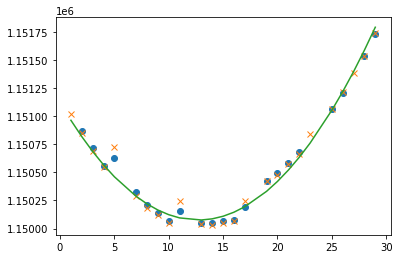

In [10]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.32393585518956
g0 =  0.11716352487901183
a  =  425.4111576441785
PS =  0.0005847072706380851
QS =  1.3833336250081508e-06
QOFF =  4.211749157787619

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))
#ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)

# Plot ISOFF vs fit
ai =  6.459480913790727
bi =  -164.25674904584716
ci =  1151120.4725255314
red105 = [ -7.82734595,    6.48103643,   15.37344189,   47.39558183,   54.25017651,
              -87.78073561,  -57.87672198,  -57.02387395,  -30.75647953,  -82.13171852,
               38.17407445,   53.9293801 ,   62.15816713,   82.60265586,  -51.04419029,
               -6.0626937,   36.28682384,   42.49162215,   70.33355788, -148.78530207,
              -52.04256692 , -29.12922045,   -4.73520485,   20.72545992, -268.51481606]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red105
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R105_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### R 130

Number of files  12
Number of files  12


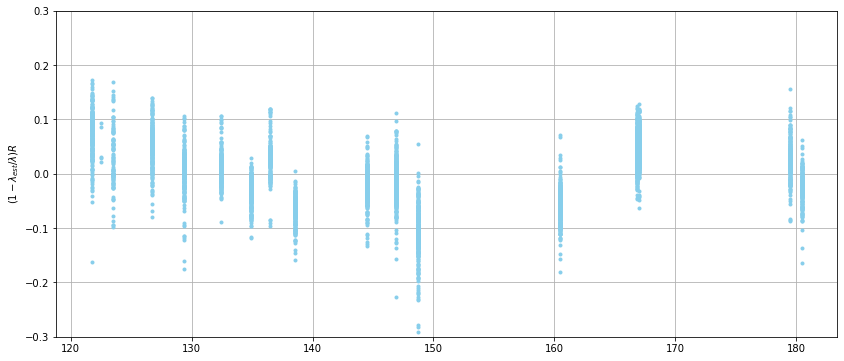

NP =  14.3245086115088
g0 =  0.11715181330163368
a  =  424.33270555473433
PS =  0.0005868592643975168
QS =  1.4727329417511014e-06
QOFF =  5.786293009405274

ai =  6.4484085229093395
bi =  -163.87877726178024
ci =  1151487.569738662


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'R'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1151435.070,
1151562.605,nan,1151912.467,1152094.413,
1150795.554,1150861.079,1150954.638,1151043.145,
nan,1150421.848,1150418.283,1150440.063,
1150456.083,1150549.816,1150676.857,1150577.616,
1150516.718,1150441.916,1150508.153,nan,
1151232.399,1151080.133,1150939.217,1150966.680]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1151435.06997095 1151562.60504764 1151745.20089118 1151912.46680097
 1152094.41299271 1150795.55430236 1150861.07896531 1150954.63848832
 1151043.14548974 1151198.56330985 1150421.84773311 1150418.28312296
 1150440.06316628 1150456.08317202 1150549.81631417 1150676.85695695
 1150577.61642604 1150516.71845831 1150441.91565406 1150508.15254599
 1151378.01473532 1151232.39916967 1151080.13274634 1150939.21728318
 1150966.67976351]


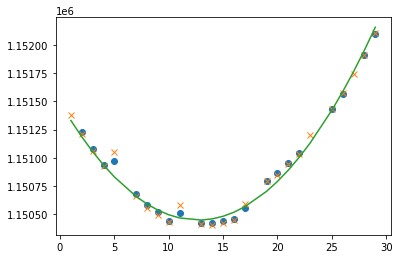

In [12]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.3245086115088
g0 =  0.11715181330163368
a  =  424.33270555473433
PS =  0.0005868592643975168
QS =  1.4727329417511014e-06
QOFF =  5.786293009405274
# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  6.4484085229093395
bi =  -163.87877726178024
ci =  1151487.569738662
red130 = [ -12.70859072,    7.50024661,   18.53167461,   41.46400465,   52.7757175,
              -95.78015715,  -56.53938436,  -54.24399594,  -33.75992799,  -68.99733959,
               31.27967525,   53.60554151,   58.10103624,   71.69960587,  -22.11761283,
               -4.64846212 ,  38.77585613,   42.34325365,   60.40053434, -118.02749666,
              -47.8753654 ,  -24.45939546,   -4.54977914,    8.74871326, -223.38722927]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red130
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R130_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### B 1

Number of files  13
Number of files  13


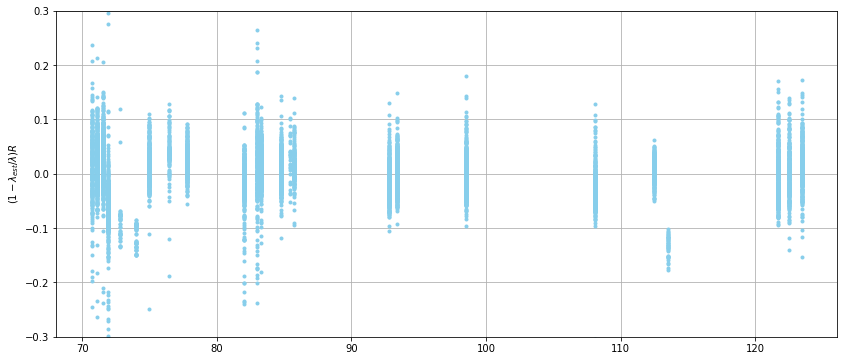

NP =  13.847057350537105
g0 =  0.082656552860566
a  =  901.4037871839093
PS =  0.0005568502360491054
QS =  9.746937268662004e-06
QOFF =  6.716541611081658

ai =  1.9011152657699404
bi =  -47.4439609763299
ci =  1075070.8781426058


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
channel = 'B'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B1', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075356.868,
1075155.591,1075154.182,1075168.899,1074891.097,
1075054.849,1074906.558,1074914.116,1074905.489,
1074692.195,1074950.990,1074809.006,1074763.635,
1074770.491,1074619.932,1074902.640,1074761.712,
1074707.598,1074739.948,1074578.572,1075149.256,
1074932.338,1074930.245,1074928.505,1074724.020]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075356.86845439 1075155.59055756 1075154.18235171 1075168.89940312
 1074891.09724397 1075054.84936643 1074906.55817803 1074914.11575581
 1074905.48935479 1074692.19548398 1074950.99046143 1074809.00591673
 1074763.63541527 1074770.49149725 1074619.93151383 1074902.63961565
 1074761.71245008 1074707.59773058 1074739.9480419  1074578.57236699
 1075149.25598292 1074932.33839774 1074930.24465778 1074928.50484595
 1074724.01979999]


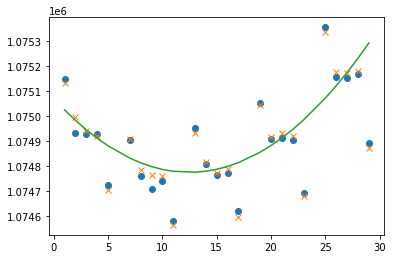

In [15]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  13.847057350537105
g0 =  0.082656552860566
a  =  901.4037871839093
PS =  0.0005568502360491054
QS =  9.746937268662004e-06
QOFF =  6.716541611081658

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.9011152657699404
bi =  -47.4439609763299
ci =  1075070.8781426058

blue1 = [-263.92944121,  -53.59084654,    1.16697799,   51.19513828,  422.65026353,
             -189.63033763,  -33.17725668,  -19.96267952,   26.01302266,  307.31828786,
             -156.31979898,  -37.76920495,   14.25657713,    9.02851029,  216.42404114,
              -75.57154681,   28.56399698,   33.54483603,   24.91445915,  215.17805003,
             -108.48468372,  -12.59286879,    6.90170244,  -10.74710888,  175.93175233]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue1
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B1_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]


### B 2

Number of files  19
Number of files  19


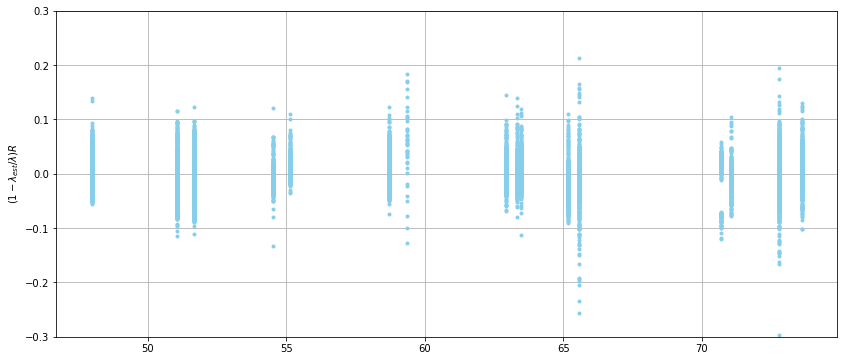

NP =  14.56333119192742
g0 =  0.08266144153475251
a  =  830.888435626825
PS =  0.0005607825250826914
QS =  6.997390828797649e-06
QOFF =  6.326875742882822

ai =  1.962338645995222
bi =  -51.01737360809126
ci =  1075047.637155074


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/Reduced/'
channel = 'B'
order = '2'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 2
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B2', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075178.791,
1075083.084,1075095.997,1075103.723,1074774.548,
1074916.117,1074839.559,1074873.195,1074857.572,
1074574.617,1074821.036,1074749.686,1074719.949,
1074728.834,1074501.518,1074810.907,1074726.990,
1074708.430,1074694.457,1074462.905,1075067.870,
1074944.358,1074899.774,1074888.039,1074609.331]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075178.79060111 1075083.0843768  1075095.99730837 1075103.72291605
 1074774.54802959 1074916.11696849 1074839.55920982 1074873.19469676
 1074857.57210127 1074574.61659742 1074821.03572062 1074749.68555059
 1074719.94946762 1074728.83377903 1074501.51775144 1074810.90725375
 1074726.98965514 1074708.43016914 1074694.45729303 1074462.90496286
 1075067.86972174 1074944.35755408 1074899.7737566  1074888.03876599
 1074609.33147514]


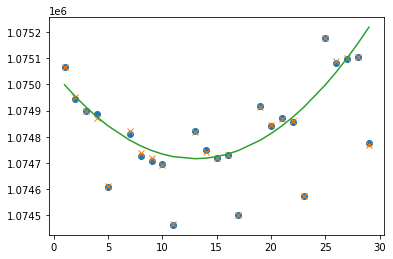

In [17]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.56333119192742
g0 =  0.08266144153475251
a  =  830.888435626825
PS =  0.0005607825250826914
QS =  6.997390828797649e-06
QOFF =  6.326875742882822

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',2
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.962338645995222
bi =  -51.01737360809126
ci =  1075047.637155074
blue2 = [-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02]
x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue2
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B2_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

# Output

In [18]:
# Print the parameters (Old style)
print(',2112,,,')
header = ',Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order'
print(header)
parametes  = ['g0','NP','a','ISF','gamma','PS','QOFF','QS','ISOFF'] 
for r105, r130, b1, b2 in zip(R105_pars[:-1], R130_pars[:-1], B1_pars[:-1], B2_pars[:-1]):
    print(',{0:.5e}, {1:.5e}, {2:.5e}, {3:.5e}'.format(r105, r130, b1 ,b2))
for i, (r105, r130, b1, b2) in enumerate(zip(R105_pars[-1], R130_pars[-1], B1_pars[-1], B2_pars[-1])):
    print(',{1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}'.format(i,r105, r130, b1, b2))

,2112,,,
,Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order
,1.17164e-01, 1.17152e-01, 8.26566e-02, 8.26614e-02
,1.43239e+01, 1.43245e+01, 1.38471e+01, 1.45633e+01
,4.25411e+02, 4.24333e+02, 9.01404e+02, 8.30888e+02
,1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00
,1.67200e-02, 1.67200e-02, 8.90080e-03, 8.90080e-03
,5.84707e-04, 5.86859e-04, 5.56850e-04, 5.60783e-04
,4.21175e+00, 5.78629e+00, 6.71654e+00, 6.32688e+00
,1.38333e-06, 1.47273e-06, 9.74694e-06, 6.99739e-06
,1151064.875, 1151435.070, 1075356.868, 1075178.791
,1151202.324, 1151562.605, 1075155.591, 1075083.084
,1151379.128, 1151745.201, 1075154.182, 1075095.997
,1151532.460, 1151912.467, 1075168.899, 1075103.723
,1151725.479, 1152094.413, 1074891.097, 1074774.548
,1150421.971, 1150795.554, 1075054.849, 1074916.117
,1150491.404, 1150861.079, 1074906.558, 1074839.559
,1150580.045, 1150954.638, 1074914.116, 1074873.195
,1150677.072, 1151043.145, 1074905.489, 1074857.572
,1150841.764, 1151198.563, 1074692.195, 1074574.617

# New Output

In [19]:
date = '20211201'
print('# 2112')
channel = 'R105'
fmt = '{0:s} {1:s} {2:.9f} {3:.8f} {4:.7f} {5:.9f} {6:.9f} {7:.5e} '+\
'{8:.3f} {9:.3f} {10:.3f} {11:.3f} {12:.3f} {13:.3f} {14:.3f} {15:.3f} {16:.3f} {17:.3f} '+\
'{18:.3f} {19:.3f} {20:.3f} {21:.3f} {22:.3f} {23:.3f} {24:.3f} {25:.3f} {26:.3f} {27:.3f} '+\
'{28:.3f} {29:.3f} {30:.3f} {31:.3f} {32:.3f}'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1', 'B2']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

for channel, d in zip(channels, data):
    print('{0:s} {1:s} '.format(date, channel), end='')
    print('{0:.9f} {1:.8f} {2:.7f} '.format(d[0], d[1], d[2]), end='')
    print('{0:.9f} {1:.9f} {2:.5e} '.format(d[5], d[6], d[7]), end='')
    for r in d[-1]:
        print('{0:.3f} '.format(r), end='')
    print()

# 2112
20211201 R105 0.117163525 14.32393586 425.4111576 0.000584707 4.211749158 1.38333e-06 1151064.875 1151202.324 1151379.128 1151532.460 1151725.479 1150421.971 1150491.404 1150580.045 1150677.072 1150841.764 1150048.423 1150046.713 1150064.005 1150073.355 1150192.447 1150324.877 1150212.718 1150141.046 1150071.747 1150157.807 1151014.718 1150864.421 1150713.575 1150560.143 1150630.987 
20211201 R130 0.117151813 14.32450861 424.3327056 0.000586859 5.786293009 1.47273e-06 1151435.070 1151562.605 1151745.201 1151912.467 1152094.413 1150795.554 1150861.079 1150954.638 1151043.145 1151198.563 1150421.848 1150418.283 1150440.063 1150456.083 1150549.816 1150676.857 1150577.616 1150516.718 1150441.916 1150508.153 1151378.015 1151232.399 1151080.133 1150939.217 1150966.680 
20211201 B1 0.082656553 13.84705735 901.4037872 0.000556850 6.716541611 9.74694e-06 1075356.868 1075155.591 1075154.182 1075168.899 1074891.097 1075054.849 1074906.558 1074914.116 1074905.489 1074692.195 1074950.990 107

In [20]:
# Write an output file with all the parameters [Old format]
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
with open(rootdir+'parameters.csv', 'w') as f:
    f.write('date, channel, g0,NP,a,ISF,gamma,PS,QOFF,QS,')
    for i in range(1,25):
        f.write('ISOFF'+str(i)+',')
    f.write('ISOFF25\n')
    f.write('# 2105\n')
    for channel, pars in zip(['R105','R130','B1','B2'], [R105_pars, R130_pars, B1_pars, B2_pars]):
        f.write('20210501, '+channel)
        for p in pars[:-1]:
            f.write(', {0:.5e}'.format(p))
        for p in pars[-1]:
            f.write(', {0:.3f}'.format(p))
        f.write('\n')

In [21]:
rootdir = '/home/dario/FIFI-LS/Calibration/OC9I/wavcal/'
header = '# Date   ch   g0           NP           a            PS           QOFF         QS           ISOFF1       ISOFF2       ISOFF3       ISOFF4       ISOFF5       ISOFF6       ISOFF7       ISOFF8       ISOFF9       ISOFF10      ISOFF11      ISOFF12      ISOFF13      ISOFF14      ISOFF15      ISOFF16      ISOFF17      ISOFF18      ISOFF19      ISOFF20      ISOFF21      ISOFF22      ISOFF23      ISOFF24      ISOFF25'
date = '20211201'
channel = 'R105'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1  ', 'B2  ']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

with open(rootdir+'parameters.txt', 'w') as f:
    f.write(header)
    f.write('\n')
    f.write('# 2112\n')
    for channel, d in zip(channels, data):
        f.write('{0:s} {1:s} '.format(date, channel))
        f.write('{0:.9f}  {1:.8f}  {2:.7f}  '.format(d[0], d[1], d[2]))
        f.write('{0:.9f}  {1:.9f}  {2:.5e}'.format(d[5], d[6], d[7]))
        for r in d[-1]:
            f.write('  {0:.3f}'.format(r))
        f.write('\n')
    